#Conexão com o Google Drive

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importação das bibliotecas

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


#Testes isolados

##Base de dados

In [16]:
df = pd.read_csv('/content/drive/MyDrive/1.Base Inicial.xlsx - Sheet1.csv')
df

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


##Tirando os comentários do BTG

In [4]:
df = pd.read_csv('/content/drive/MyDrive/1.Base Inicial.xlsx - Sheet1.csv')
df
df_filtered = df.loc[df['autor'] != 'btgpactual']
df_filtered

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
10,10,11,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...,CkG9KXjpY2B,reply,REELS,17961352247055161,17983688287717831,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-24 17:40:49,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
13,13,14,erikacoimbra,👏👏👏,CkG9KXjpY2B,comment,REELS,17943066782219685,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1794...,2022-10-25 19:13:45,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
14,14,15,anapaulanakade,"O app está travando desde ontem, está em manut...",CkG9KXjpY2B,comment,REELS,17988010663613927,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 12:54:54,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
15,15,16,rosanakassar,"Abri uma conta, mas achei muito complicado inv...",CkG9KXjpY2B,comment,REELS,17955765434145877,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:03:51,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
16,16,17,luizantoniojovinodossan,👏,CkG9KXjpY2B,comment,REELS,17868806699792839,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 00:30:31,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,4542,3028275,gui.decicco,Participe da conferência econômica mais import...,Cn5MCVvP1H3,mention,CAROUSEL_ALBUM,17989315081750052,-,https://www.instagram.com/p/Cn5MCVvP1H3/,2023-01-26 18:31:44,2023-01-26 18:35:02,-1.0,0.0,0.0,-1.0
4543,4543,3028307,giballiana,A melhor que temos 🥰🥰,Cn4bcg7LM4t,comment,REELS,17913917285610958,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1791...,2023-01-26 18:47:19,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [5]:
df['tipoInteracao'].value_counts()

comment              2585
reply                1208
mention               600
17989148149644662       1
17941425488528299       1
17940168110581080       1
18029962657439794       1
17892130889753631       1
17959643528485936       1
17956093724502556       1
17955500384497942       1
17953032530489386       1
17936406785531503       1
18079494631320397       1
17947308392256542       1
17959562249183697       1
17972701729819821       1
17984662891640337       1
17996365177604135       1
17934517190439239       1
17962619965952420       1
17986664653725147       1
17989225051630664       1
18186008719240695       1
17969932015944037       1
18002867089480998       1
17960657227952465       1
17963686748049432       1
18060774460321501       1
17989677946559344       1
17991378589686392       1
Name: tipoInteracao, dtype: int64

In [6]:
df = pd.read_csv("/content/drive/MyDrive/1.Base Inicial.xlsx - Sheet1.csv", usecols={'texto'})
df

,texto
0,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe..."
1,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ..."
2,@luizantoniojovinodossan 🚀 💙
3,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...
4,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co..."
...,...
4544,"Estão contratando muitos blogueiros, mas eu fi..."
4545,@xubs._ 💙
4546,Agradecemos o seu feedback! 💙
4547,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼


#Tokenização

In [7]:
frases = [
    "Emprego dos sonhos!",
    "Investindo onde somos mais eficientes!",
    "\"Agro é tech, agro é pop... agro é @btgpactual !\"",
    "O app está dando erro pra entrar toda hora. Só funciona se clicar em adicionar nova conta..como resolver?",
    "Vcs me cobraram hoje o valor do profit mesmo após eu ter cancelado em abril e agora minha conta tá negativa e isso que cobraram o profit de abril sendo que eu cumpri as regras da promoção",
    "Tinha q parar esses feriados na b3.",
    "Cade a inclusao? Cade os pretos executivos da Btg",
    "@btgpactual meu App não está funcionando me ajudem, mandei msg pra vocês no chat e nada de retorno, tento falar no chat sem sucesso! Preciso da ajuda de vcs",
    "Tô gostando desse banco"
]

palavras = []
for frase in frases:
    frase_minusculo = frase.lower()
    frase_palavras = frase_minusculo.split()
    palavras.extend(frase_palavras)

print(palavras)

['emprego', 'dos', 'sonhos!', 'investindo', 'onde', 'somos', 'mais', 'eficientes!', '"agro', 'é', 'tech,', 'agro', 'é', 'pop...', 'agro', 'é', '@btgpactual', '!"', 'o', 'app', 'está', 'dando', 'erro', 'pra', 'entrar', 'toda', 'hora.', 'só', 'funciona', 'se', 'clicar', 'em', 'adicionar', 'nova', 'conta..como', 'resolver?', 'vcs', 'me', 'cobraram', 'hoje', 'o', 'valor', 'do', 'profit', 'mesmo', 'após', 'eu', 'ter', 'cancelado', 'em', 'abril', 'e', 'agora', 'minha', 'conta', 'tá', 'negativa', 'e', 'isso', 'que', 'cobraram', 'o', 'profit', 'de', 'abril', 'sendo', 'que', 'eu', 'cumpri', 'as', 'regras', 'da', 'promoção', 'tinha', 'q', 'parar', 'esses', 'feriados', 'na', 'b3.', 'cade', 'a', 'inclusao?', 'cade', 'os', 'pretos', 'executivos', 'da', 'btg', '@btgpactual', 'meu', 'app', 'não', 'está', 'funcionando', 'me', 'ajudem,', 'mandei', 'msg', 'pra', 'vocês', 'no', 'chat', 'e', 'nada', 'de', 'retorno,', 'tento', 'falar', 'no', 'chat', 'sem', 'sucesso!', 'preciso', 'da', 'ajuda', 'de', 'vcs',

#Tokenização e retirar pontuação e retirar stop words


In [8]:
def tokenize_text(text):
    if isinstance(text, str):
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text.lower())
        stop_words = set(stopwords.words('portuguese'))
        tokens = [token for token in tokens if token not in stop_words]
    else:
        tokens = []
    return tokens

df['word_counts'] = df['texto'].apply(tokenize_text)

for i, row in df.iterrows():
    print(f"Word counts for row {i}:")
    print(row['word_counts'])

Streaming output truncated to the last 5000 lines.
Word counts for row 2049:
['ótimo', 'limite', 'simplesmente', 'justificativa', 'baixaram', 'metade', 'sempre', 'paguei', 'fatura', 'dia', 'decepcionada']
Word counts for row 2050:
['roseli_vohs_deluca', 'aconteceu', 'mesma', 'coisa', 'comigo', 'passei', 'constrangimento', 'ainda', 'hora', 'passar', 'cartão', 'diminuíram', 'limite', 'avisar', 'antecedência', 'desrespeito']
Word counts for row 2051:
['pré', 'fixado', 'agora', 'furada', 'selic', 'vai', 'disparar', '23']
Word counts for row 2052:
[]
Word counts for row 2053:
[]
Word counts for row 2054:
['recentemente', 'ocorreu', 'evento', 'encerramento', 'programa', 'mentoria', 'realizado', 'btgpactual', 'parceria', 'ago', 'social', 'programa', 'voltado', 'auxílio', 'instituições', 'cooperativas', 'atuam', 'terceiro', 'setor', 'possam', 'adquirir', 'sustentabilidade', 'financeira', 'capacitação', 'lideranças', 'melhor', 'gestão', 'negócios', 'socioambientais', 'instituto', 'espaço', 'sil

#Tokenização e retirar pontuação e retirar stop words e stemming


In [9]:
def tokenize_text(text):
    if isinstance(text, str):
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text.lower())
        stop_words = set(stopwords.words('portuguese'))
        tokens = [token for token in tokens if token not in stop_words]
        stemmer = RSLPStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        word_counts = {}
        for token in stemmed_tokens:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1
        word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
        word_counts_df = word_counts_df.sort_values('count', ascending=False)
    else:
        word_counts_df = pd.DataFrame(columns=['count'])
    return word_counts_df

df['word_counts'] = df['texto'].apply(tokenize_text)

for i, row in df.iterrows():
    print(f"Word counts for row {i}:")
    print(row['word_counts'])

Streaming output truncated to the last 5000 lines.
nom                     1
brasil                  1
regilem                 1
reginald                1
pouc                    1
acquaver                1
tir                     1
avinexperienc           1
Word counts for row 3801:
      count
pens      1
abr       1
cont      1
Word counts for row 3802:
         count
melhor       2
complet      1
3            1
mes          1
btg          1
volt         1
cas          1
bilhã        1
tud          1
convicç      1
fiz          1
escolh       1
parabém      1
tim          1
eth          1
Word counts for row 3803:
          count
btg           2
quer          1
abr           1
cont          1
final         1
cadastr       1
err           1
ajudaaaa      1
gentil        1
Word counts for row 3804:
                 count
elosago_bitcoin      2
começ                1
coloc                1
rs1000               1
8                    1
dia                  1
lucr                 1
rs142

#Frequência das palavras

In [10]:
from keras.preprocessing.text import Tokenizer

document = df['texto']

document = document.apply(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(document)
print(f'Vocabulário: {list(tokenizer.word_index.keys())}')

vectors = tokenizer.texts_to_matrix(document, mode='count')
print(vectors)

Vocabulário: ['de', 'e', 'o', 'a', 'que', 'com', 'do', 'para', 'em', 'é', 'um', 'no', 'não', 'mais', 'uma', 'btg', 'banco', 'da', 'eu', 'na', 'meu', 'por', 'os', 'você', '💙', 'tudo', 'limite', 'te', 'btgpactual', 'como', 'bem', 'me', 'conta', 'muito', 'se', 'minha', 'seu', '🚀', 'cartão', 'as', 'olá', 'investimentos', 'pra', 'sua', 'sem', 'estamos', 'nos', 'ao', 'pelo', 'esse', 'dos', 'nosso', 'tem', '😉', 'isso', 'foi', 'está', 'dia', 'obrigado', 'ajudar', 'melhor', 'mas', 'dinheiro', 'já', 'todos', 'pode', 'estou', 'sempre', 'aqui', 'só', 'sobre', 'dias', 'ser', 'ou', 'são', 'agora', 'crédito', 'eles', 'investimento', 'pactual', 'vocês', 'também', 'vai', 'qualquer', 'pela', '👏👏👏', 'clientes', '1', 'link', 'bom', 'enviamos', 'à', 'das', 'dúvida', '000', 'ano', 'essa', 'nada', 'cliente', 'fazer', '2', 'nossos', 'tenho', 'quem', 'quando', 'hoje', 'mensagem', 'caso', '👏', 'nunca', 'vcs', 'investir', 'até', 'atendimento', 'mesmo', 'vida', 'todo', 'brasil', 'assertividade', 'r', 'ter', 'nan'

In [11]:
def tokenize_text(text):
    if isinstance(text, str):
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text.lower())
        stop_words = set(stopwords.words('portuguese'))
        tokens = [token for token in tokens if token not in stop_words]
    else:
        tokens = []
    return tokens

df['word_counts'] = df['texto'].apply(tokenize_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['word_counts'].sum())

tokenizer_df = pd.DataFrame(list(tokenizer.word_counts.items()), columns=['Palavra', 'Frequência'])

tokenizer_df = tokenizer_df.sort_values(by='Frequência', ascending=False)

print(tokenizer_df.to_string(index=False))

                             Palavra  Frequência
                                 btg         581
                               banco         516
                                tudo         370
                              limite         370
                          btgpactual         364
                                 bem         327
                               conta         311
                              cartão         260
                                 olá         243
                       investimentos         233
                                 pra         230
                                 dia         191
                            obrigado         189
                              ajudar         187
                              melhor         185
                            dinheiro         180
                               todos         179
                                pode         175
                              sempre         169
                    

#Plotando gráficos

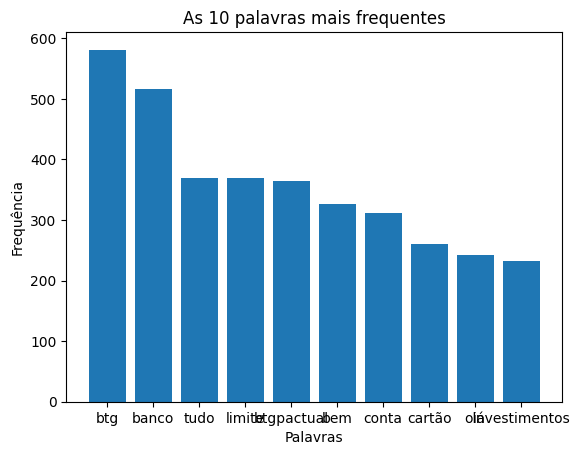

In [12]:
top_words = tokenizer_df['Palavra'].head(10)
word_freq = tokenizer_df['Frequência'].head(10)

plt.bar(top_words, word_freq)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 10 palavras mais frequentes')
plt.show()

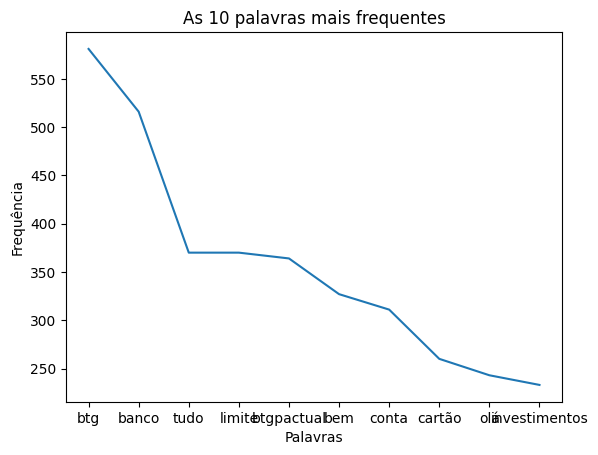

In [13]:
top_words = tokenizer_df['Palavra'].head(10)
word_freq = tokenizer_df['Frequência'].head(10)

plt.plot(top_words, word_freq)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 10 palavras mais frequentes')
plt.show()

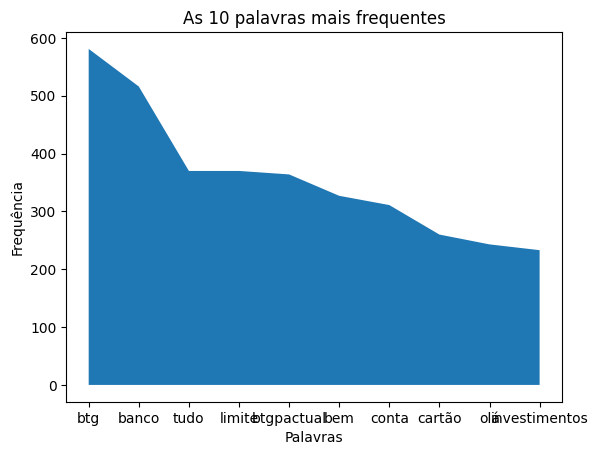

In [14]:
top_words = tokenizer_df['Palavra'].head(10)
word_freq = tokenizer_df['Frequência'].head(10)

plt.fill_between(top_words, word_freq)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 10 palavras mais frequentes')
plt.show()

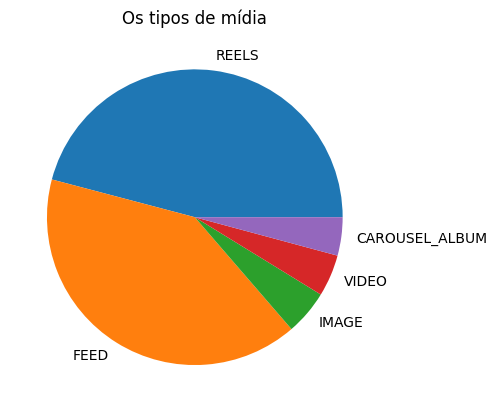

In [17]:
top_mediatypes = df.groupby(['tipoMidia']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(5)
plt.pie(top_mediatypes['counts'], labels=top_mediatypes['tipoMidia'])
plt.title('Os tipos de mídia')
plt.show()

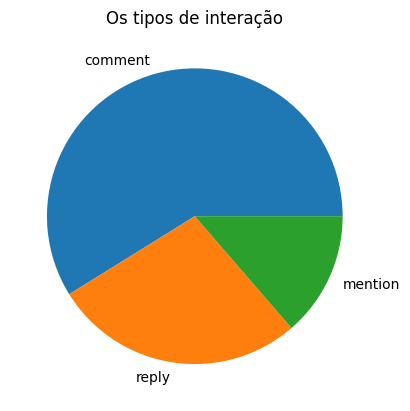

In [18]:
top_interactions = df.groupby(['tipoInteracao']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(3)
plt.pie(top_interactions['counts'], labels=top_interactions['tipoInteracao'])
plt.title('Os tipos de interação')
plt.show()